**PRACTICA 5** - **Sergio González Martínez**


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

Red de familias Medici vs Pazzi

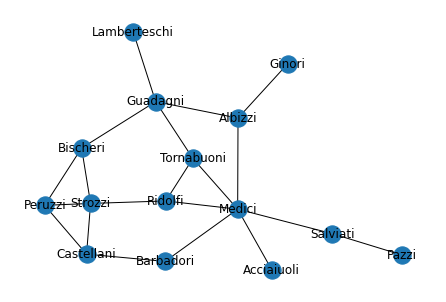

In [2]:
grafo=nx.florentine_families_graph()
nx.draw(grafo,with_labels=True)
plt.show()


Utilizaremos la medida de Vector propia para conocer el grado de estatus, influencia de los nodos de las familias de nuestro grafo, por tanto tendran mayor rango aquellas familias que esten conocectadas con otros nodos que a su vez son muy relevantes.

In [3]:
#Sacamos el rango de centralidad
rank=nx.eigenvector_centrality(grafo, max_iter=100, tol=1e-06, nstart=None, weight=None)
print(nx.eigenvector_centrality(grafo, max_iter=100, tol=1e-06, nstart=None, weight=None))

{'Acciaiuoli': 0.1321573195285342, 'Medici': 0.4303154258349923, 'Castellani': 0.2590200378423514, 'Peruzzi': 0.2757224374104833, 'Strozzi': 0.3559730326460451, 'Barbadori': 0.2117057470647985, 'Ridolfi': 0.3415544259074365, 'Tornabuoni': 0.325846704169574, 'Albizzi': 0.2439605296754477, 'Salviati': 0.14592084164171834, 'Pazzi': 0.044814939703863084, 'Bischeri': 0.2827943958713356, 'Guadagni': 0.2891171573226501, 'Ginori': 0.0749245316027793, 'Lamberteschi': 0.08879253113499548}


In [4]:
def cogerSegundo(elemento):
    return elemento[1]
#Funcion que nos dara una lista con los colores ya ordenados para nuestros grafos.
def OrdenarRangos(grafo,dicc):
    listaRangosOrdenada=[]
    #Funcion que complementa la funcion Key del sort de las listas

    #Ordenamos los nodos
    for (x,y) in dicc.items():
        listaRangosOrdenada.append((x,y))
    listaRangosOrdenada.sort(key=cogerSegundo)
    listaRangosOrdenada.reverse()
    print(listaRangosOrdenada)
    NodosYcolores=[]
    nodos=[]
    color=1
    #Asignamos colores a nuestros nodos de manera ordenada.
    for (node,value) in listaRangosOrdenada:
        NodosYcolores.append((node,color))
        color-=0.01
    colores_map=dict(NodosYcolores)
    valores_colors=[colores_map.get(node) for node in grafo.nodes()]
    print("\n***********NUESTRO MAPA DE COLORES, este le usaremos para darles preferencia de color al dibujar el mapa***********\n")
    print(valores_colors)
    print("***********\nNUESTROS NODOS Y COLORES***********\n")
    print(colores_map)
    return valores_colors
def dibujarGrafo(grafo,colores):
    nx.draw(grafo, cmap=plt.cm.YlGn, node_color=colores, with_labels=True, font_color='black', node_size=500)

In [5]:
valores_colors=OrdenarRangos(grafo,rank)
     

[('Medici', 0.4303154258349923), ('Strozzi', 0.3559730326460451), ('Ridolfi', 0.3415544259074365), ('Tornabuoni', 0.325846704169574), ('Guadagni', 0.2891171573226501), ('Bischeri', 0.2827943958713356), ('Peruzzi', 0.2757224374104833), ('Castellani', 0.2590200378423514), ('Albizzi', 0.2439605296754477), ('Barbadori', 0.2117057470647985), ('Salviati', 0.14592084164171834), ('Acciaiuoli', 0.1321573195285342), ('Lamberteschi', 0.08879253113499548), ('Ginori', 0.0749245316027793), ('Pazzi', 0.044814939703863084)]

***********NUESTRO MAPA DE COLORES, este le usaremos para darles preferencia de color al dibujar el mapa***********

[0.8899999999999999, 1, 0.9299999999999999, 0.94, 0.99, 0.9099999999999999, 0.98, 0.97, 0.9199999999999999, 0.8999999999999999, 0.8599999999999999, 0.95, 0.96, 0.8699999999999999, 0.8799999999999999]
***********
NUESTROS NODOS Y COLORES***********

{'Medici': 1, 'Strozzi': 0.99, 'Ridolfi': 0.98, 'Tornabuoni': 0.97, 'Guadagni': 0.96, 'Bischeri': 0.95, 'Peruzzi': 0.94

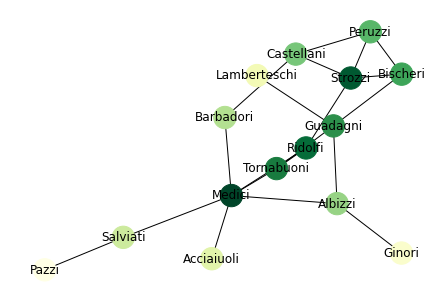

In [6]:
dibujarGrafo(grafo,valores_colors)

Cuanto mas oscuro, mas rango tiene.

**RED DE FUTBOL**

In [7]:
G=nx.read_pajek(r"C:\Users\Sergi\Desktop\practica5\football.txt")
redFutbol=nx.Graph(G)

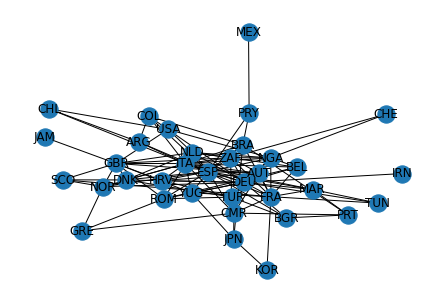

In [8]:
nx.draw(redFutbol,with_labels=True, node_size=300)

In [9]:
rankRedFutbol=nx.pagerank(redFutbol, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)


In [10]:
valores_colorsFutbol=OrdenarRangos(redFutbol,rankRedFutbol)

[('ESP', 0.08052353514958621), ('GBR', 0.0740359802585635), ('ITA', 0.07094447884575018), ('DEU', 0.0695271971835583), ('BRA', 0.04173222926848963), ('FRA', 0.040785549742002845), ('NGA', 0.03503601484763108), ('CMR', 0.03454835933549145), ('NLD', 0.03413583658783053), ('NOR', 0.033961129329876084), ('YUG', 0.0326261194620482), ('TUR', 0.0303603555990051), ('ZAF', 0.030140119167345814), ('ROM', 0.029502697319828446), ('ARG', 0.028308750726365437), ('PRY', 0.026728707801668358), ('DNK', 0.025365841269057474), ('MAR', 0.023455695426016818), ('AUT', 0.023424618207985), ('HRV', 0.022610229051802953), ('SCO', 0.02251963949049543), ('JPN', 0.020505164753542367), ('BEL', 0.01935683094374247), ('BGR', 0.018592959168355513), ('USA', 0.018046191640247115), ('COL', 0.017447104919324545), ('PRT', 0.01488126655641699), ('KOR', 0.013477056441325352), ('JAM', 0.01309624804412218), ('TUN', 0.012901740250733762), ('GRE', 0.011164406727446681), ('CHL', 0.008688520458591552), ('IRN', 0.00840895423357662)

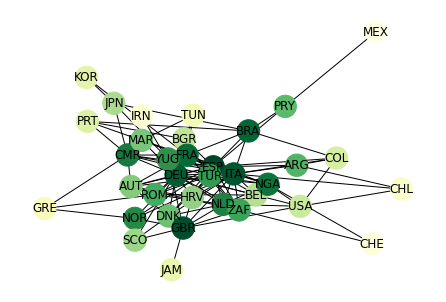

In [11]:
dibujarGrafo(redFutbol,valores_colorsFutbol)

Cuanto mas oscuro, mas rango tiene.
Podemos ver mediante el uso de la medida de centralidad utilizada por google, el pagerank, compara los que entraban con los que salian, de manera que España esta en el rago mas alto.